Vega-Lite is a charting library that provides a great deal of flexibility
while also allowing for very simple use cases.

The Vega-Lite JavaScript API provides a convenient way to write Vega-Lite
specifications in a programmatic fashion.

* (see [@vega/vega-lite-api-v5 on observablehq](https://observablehq.com/@vega/vega-lite-api-v5) for a great introduction)
* (see [vega-lite documentation](https://observablehq.com/@vega/vega-lite-api-v5) for deeper options)

![Screenshot of vega lite examples from vega-lite home](../img/vegaLiteExamples.png)

Under the hood, it creates complete [Vega Charting specifications](https://vega.github.io/)
that further uses [d3 as a visualization kernel](https://vega.github.io/vega/about/vega-and-d3/)

In our case two options are supported:

* through the [vega-lite JSON specification](https://vega.github.io/vega-lite/tutorials/getting_started.html) - a high level grammar that creates 
* through the [vega-lite-api](https://vega.github.io/vega-lite-api/) - a JavaScript api to write the vega-lite specifications

(As quick summary: [Vega-Lite-Api](https://vega.github.io/vega-lite-api/): creates
-> [Vega-Lite JSON specifications](https://vega.github.io/vega-lite/tutorials/getting_started.html): creates -> [Vega charting specifications](https://vega.github.io/): -> using [D3 as a visualization kernel](https://vega.github.io/vega/about/vega-and-d3/))

For more:

* See the excellent [Vega-Lite-API Observable Notebooks](https://observablehq.com/collection/@vega/vega-lite-api)
 and [Jeffrey Heer's Curriculum](https://observablehq.com/@uwdata/data-visualization-curriculum?collection=@uwdata/visualization-curriculum)
* or see the [Vega-Lite Examples](https://vega.github.io/vega-lite/examples/) and [Vega Examples](https://vega.github.io/vega/examples/)
* additionally see the [y-combinator article with a developer here](https://news.ycombinator.com/item?id=24937954)

## Libraries Used

First we will need an instance of the `jupyter-ijavascript-utils` library.

In [1]:
utils = require('jupyter-ijavascript-utils');
['utils'];

[ 'utils' ]

## Getting Data

We'll be working with three datasets:

### Explicit Data:

In [2]:
//-- explicit data
simpleData = [{fruit:'Apples',yield:20,year:'2020'},{fruit:'Apples',yield:22,year:'2021'},
              {fruit:'Bananas',yield:15,year:'2020'},{fruit:'Bananas',yield:12,year:'2021'},
              {fruit:'Pears',yield:18,year:'2020'},{fruit:'Pears',yield:19,year:'2021'}];
$$.json(simpleData);

### Datasets module / Vega-Datasets

Data loaded from {@link module:datasets|the datasets / vega-datasets module} 

In [3]:
//-- note that as this is using the ijs.await function,
//-- cells afterward can be synchronous and still assume the data is loaded

utils.ijs.await(async ($$, console) => {
  cars = await utils.datasets.fetch('cars.json');
  console.log(`loaded cars:${cars.length}`);
});

loaded cars:406


### URL within the Spec

We can also request that vega make the request for the data,
    if it is within the specification.

## Libraries Used

First we will need an instance of the `jupyter-ijavascript-utils` library.

In [4]:
utils = require('jupyter-ijavascript-utils');
['utils'];

[ 'utils' ]

## Getting Started

The simplext example is to render a small dataset:

We would like to render this into a chart, say with points first:

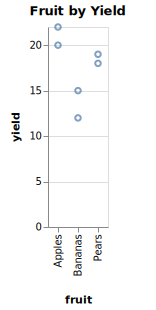

In [5]:
utils.vega.svg(
    // accept the reference to the vega-lite instance
    (vl) =>
    // render as points
    vl.markPoint()
        // use simpleData as the data source
        .data(simpleData)
        // title
        .title('Fruit by Yield')
        // this is where the x, and y are encoded
        .encode(
            // use the 'yield' property as the y axis
            // note this is fieldQ - a qualitative number with a numeric value
            vl.y().fieldQ('yield'),
            // use the 'fruit' property as the x axis
            // note this is fieldN - a nominative string with no numeric value
            vl.x().fieldN('fruit')
        )
)

### Flip the X and Y axis

Note that the order that we put the axes don't matter.

Let's swap the fields used by the x and y axes:

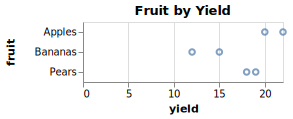

In [6]:
utils.vega.svg(
    // accept the reference to the vega-lite instance
    (vl) =>
    vl.markPoint()
        .data(simpleData)
        .title('Fruit by Yield')
        .encode(
            // use the x axis as the yield
            vl.x().fieldQ('yield'),
            // use the y axis for the fruit type
            vl.y().fieldN('fruit')
        )
)

### Color Code by Year

We can also change the shape, the size, the color and other attributes based on the type of data we have.

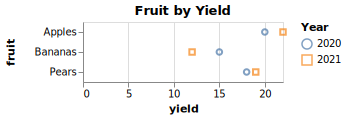

In [7]:
utils.vega.svg(
    // accept the reference to the vega-lite instance
    (vl) =>
    vl.markPoint()
        .data(simpleData)
        .title('Fruit by Yield')
        .encode(
            vl.x().fieldQ('yield'),
            vl.y().fieldN('fruit'),
            //-- add the shape attribute
            vl.shape().fieldN('year').title('Year'),
            //-- add the color attribute
            vl.color().fieldN('year').title('Year')
        )
)

## Make a Line Chart

We can change the type of mark to `markLine` to make it a line chart

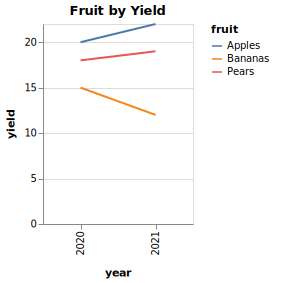

In [8]:
utils.vega.svg(
    (vl) =>
    // change from `markPoint` to `markLine`
    vl.markLine()
        .data(simpleData)
        .title('Fruit by Yield')
        // set the width of the graph
        .width(150)
        .encode(
            vl.y().fieldQ('yield'),
            // change the field to 'year' from 'fruit'
            vl.x().fieldN('year'),
            // add a new series coloration, using 'fruit'
            vl.color().fieldN('fruit')
        )
)

## Make a Bar Chart

We can change the type of mark to `markBar` to make it a bar chart

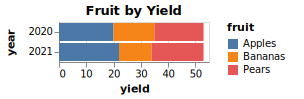

In [9]:
utils.vega.svg(
    (vl) =>
    // change to `markBar`
    vl.markBar()
        .data(simpleData)
        .title('Fruit by Yield')
        // set the width of the graph
        .width(150)
        .encode(
            vl.x().fieldQ('yield'),
            vl.y().fieldN('year'),
            vl.color().fieldN('fruit')
        )
)

## Datasets module / Vega-Datasets

We can also load data from the {@link module:datasets|the datasets / vega-datasets module} 

Note that even though the following line is synchronous, is still waits for the line above to complete before rendering.

(It does this because we are using the ijs.await function - otherwise it wouldn't wait)

In [10]:
console.log(`how many cars types do we have? ${utils.aggregate.distinct(cars, 'Name')}`)

how many cars types do we have? 311


## Types of Fields and Scales

Types of fields:
* fieldT (type: 'temporal') - time based
* fieldN (type: 'nominal') - Represents a discrete category (string)
* fieldQ (type: 'qualitative') - Represents a number

[See the Vega-Lite Axis Documentation](https://vega.github.io/vega-lite/docs/axis.html)

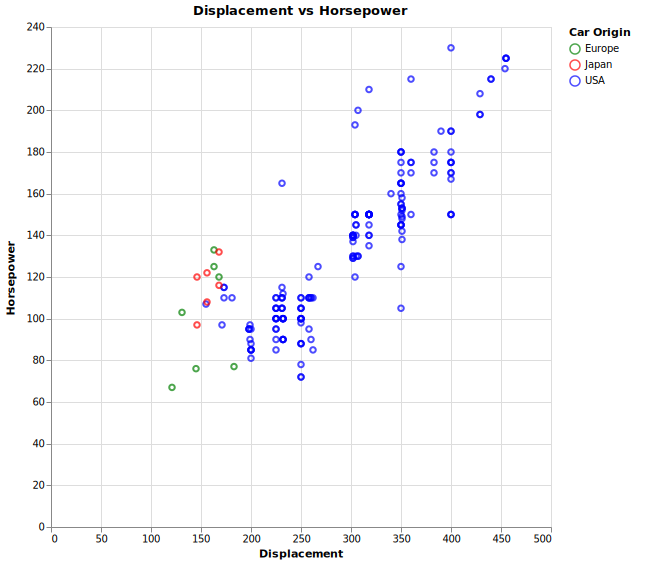

In [11]:
utils.vega.svg((vl) => vl.markPoint()
    .data(cars)
    .title('Displacement vs Horsepower')
    .width(500)
    .height(500)
    .transform(
      vl.filter('datum.Cylinders > 4')
    )
    .encode(
      //-- Qualitiative field - a number
      //-- that can have the position determined relative to another and charted
      vl.x().fieldQ('Displacement'),
      vl.y().fieldQ('Horsepower'),
      vl.color().fieldN('Origin').title('Car Origin').scale({ range: ['green', 'red', 'blue'] })
    )
  )

## Objects / Specification

Vega-Lite is simply a JavaScript API for creating the JavaScript Object specifications.

You can also include those specifications within the definition, like this:

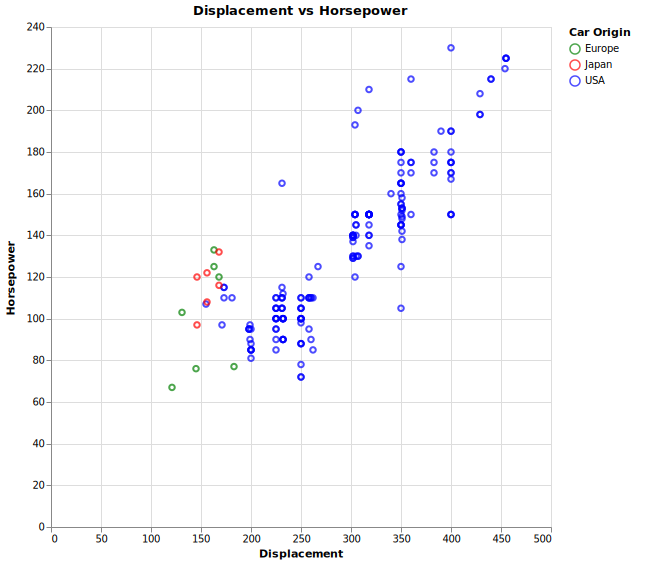

In [12]:
//-- notice how this and the specification above mirror each other.
utils.vega.svg((vl) => vl.markPoint()
    .data(cars)
    .title('Displacement vs Horsepower')
    .width(500)
    .height(500)
    .transform(
      vl.filter('datum.Cylinders > 4')
    )
    .encode(
      vl.x({field:'Displacement', type:'quantitative'}),
      vl.y({field:'Horsepower', type:'quantitative'}),
      vl.color({
       field:'Origin', title:'Car Origin', type:'nominal',
       scale: {range: ['green', 'red', 'blue']
      }}
     )
    )
  )

## Rendering Via Specifications

Rendering via the specifications can be easier for some people to understand than through the [Vega-Lite-Api](https://vega.github.io/vega-lite-api/)

It also means, you can pass directly [from the vega lite examples](https://vega.github.io/vega-lite/examples/) -
such as this one using [the bar charts example](https://vega.github.io/vega-lite/examples/bar.html)

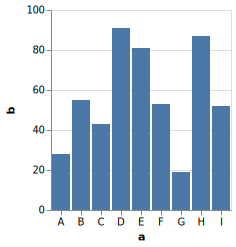

In [13]:
sampleData = [
  {"a": "A", "b": 28}, {"a": "B", "b": 55}, {"a": "C", "b": 43},
  {"a": "D", "b": 91}, {"a": "E", "b": 81}, {"a": "F", "b": 53},
  {"a": "G", "b": 19}, {"a": "H", "b": 87}, {"a": "I", "b": 52}
];
utils.vega.svgFromSpec(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    //-- data listed explicitly in the spec is also supported
    "values": sampleData
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "a", "type": "nominal", "axis": {"labelAngle": 0}},
    "y": {"field": "b", "type": "quantitative"}
  }
});

## Loading directly via URL

To load data by URL, simply set the data attribute like so:

```
    .data({ url: 'https://vega.github.io/vega-lite/examples/data/movies.json' })
```

For example:

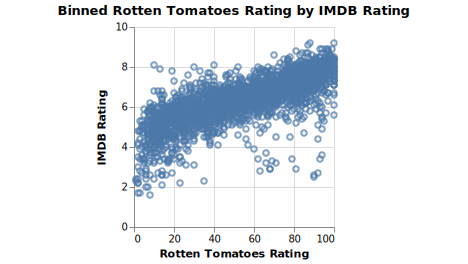

In [14]:
utils.vega.svg((vl) => 
  vl.markPoint()
    .title('Binned Rotten Tomatoes Rating by IMDB Rating')
    .data({ url: 'https://vega.github.io/vega-lite/examples/data/movies.json' })
    .encode(
      //-- limit to 20 bins
      vl.x().fieldQ('Rotten Tomatoes Rating'),
      vl.y().fieldQ('IMDB Rating')
    ));

Unfortunately though, the data is really hard to read at this size.

## Bins

Bins are especially helpful in numeric columns, as they can then group values based on various bin sizes.

Say for example, if we instead limited it to only 20 categories each. Would that be easier to read?

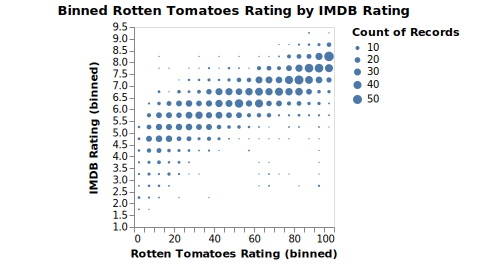

In [15]:
utils.vega.svg((vl) => 
  vl.markCircle()
    .title('Binned Rotten Tomatoes Rating by IMDB Rating')
    .data({ url: 'https://vega.github.io/vega-lite/examples/data/movies.json' })
    .encode(
      //-- limit to 20 bins
      vl.x().fieldQ('Rotten Tomatoes Rating').bin({maxbins: 20}),
      vl.y().fieldQ('IMDB Rating').bin({maxbins: 20}),
      //-- set the size based on the number of records in the 'bin'
      vl.size().count()
    ));

Much better.

# Appendix

### Note on Accessing Data

Some examples, may directly reference the data

(Note that sometimes they may use a URL that you may want to download or access directly)

In our case, the [Scatterplot Pan & Zoom example](https://vega.github.io/vega-lite/examples/selection_translate_scatterplot_drag.html)

the data is originally as follows:

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {"url": "data/cars.json"},
  ...
```

We need to change it to the full path:

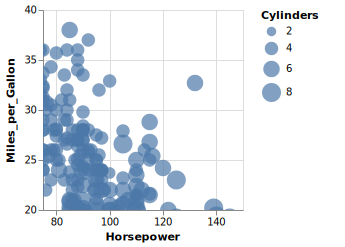

In [16]:
utils.vega.svgFromSpec({
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {"url": "https://vega.github.io/vega-lite/data/cars.json"},
  "params": [{
    "name": "grid",
    "select": "interval",
    "bind": "scales"
  }],
  "mark": "circle",
  "encoding": {
    "x": {
      "field": "Horsepower", "type": "quantitative",
      "scale": {"domain": [75, 150]}
    },
    "y": {
      "field": "Miles_per_Gallon", "type": "quantitative",
      "scale": {"domain": [20, 40]}
    },
    "size": {"field": "Cylinders", "type": "quantitative"}
  }
});

Note that the data binding can also work within `vega-lite-api`:

In [17]:
utils.vega.embed((vl) => vl.markCircle()
  .data({"url": "https://vega.github.io/vega-lite/data/cars.json"})
  .params({
    "name": "grid",
    "select": "interval",
    "bind": "scales"
  })
  .encode(
    vl.x().fieldQ('Horsepower').scale({"domain": [75, 150]}),
    vl.y().fieldQ('Miles_per_Gallon').scale({"domain": [20, 40]}),
    vl.size().fieldQ('Cylinders')
  )
)

TypeError: Cannot read properties of undefined (reading 'scripts')

## Transformations

There are many different types of transforms, and aggregations you can also do within vega.

Personally, I tend to prefer doing the aggregation beforehand, and passing the results to the `data` attribute,
but there are a number of rather interesting points why you may want to do it within Vega.

See the [y-combinator article with a developer here](https://news.ycombinator.com/item?id=24937954)

**(Notice the commas separating out statements)**

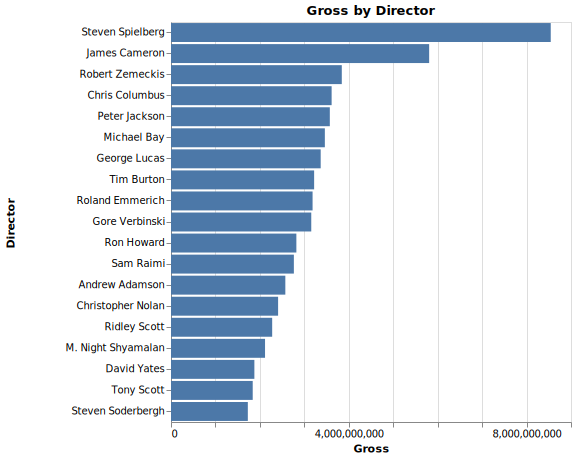

In [18]:
utils.vega.svg((vl) =>
  vl.markBar()
    .title('Gross by Director')
    .width(400).height(400)
    .data({ url: 'https://vega.github.io/vega-lite/examples/data/movies.json' })
    .transform(
      //-- filter records in dataset (datum) where .Director is found
      vl.filter('datum.Director != null'),

      //-- group by the Director field, and aggregate into the Gross field
      vl.aggregate(
          vl.sum('Worldwide Gross').as('Gross')
      ).groupby('Director'),

      //-- sort by 'Gross' and generate Rank field
      vl.window(vl.rank().as('Rank'))
        .sort(vl.field('Gross').order('descending')),

      //-- limit to only the top 20
      vl.filter('datum.Rank < 20')
    )
    .encode(
      vl.x().fieldQ('Gross'),
      vl.y().fieldN('Director')
        .sort(vl.field('Gross').order('descending'))
    ));

## Maps / Choropleths

Choropleths are data driven maps.

![Screenshot - example choropleth](../img/choropleth_example.svg)

See the Vega / Choropleth Tutorial to make your own.

## Jupyter Lab support for Vega-Lite

Note that Jupyter Lab [has support for the vega mimetype](https://jupyterlab.readthedocs.io/en/2.2.x/user/file_formats.html#vega-vega-lite),
and can be used through the {@link module:vega.vegaMimeType|vega.vegaMimeType()} and {@link module:vega.vegaLiteMimeType|vega.vegaLiteMimeType()} entries.

However, it seemed at the time of this witing that it did not work in all cases:

[Such as this example](https://vega.github.io/vega-lite/examples/interactive_query_widgets.html).

In [19]:
// however this will work:
utils.vega.embedFromSpec({
  //-- spec from the example
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "Drag the sliders to highlight points.",
  "data": {"url": "https://vega.github.io/vega-lite/examples/data/cars.json"},
  "transform": [{"calculate": "year(datum.Year)", "as": "Year"}],
  "layer": [{
    "params": [{
      "name": "CylYr",
      "value": [{"Cylinders": 4, "Year": 1977}],
      "select": {"type": "point", "fields": ["Cylinders", "Year"]},
      "bind": {
        "Cylinders": {"input": "range", "min": 3, "max": 8, "step": 1},
        "Year": {"input": "range", "min": 1969, "max": 1981, "step": 1}
      }
    }],
    "mark": "circle",
    "encoding": {
      "x": {"field": "Horsepower", "type": "quantitative"},
      "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
      "color": {
        "condition": {"param": "CylYr", "field": "Origin", "type": "nominal"},
        "value": "grey"
      }
    }
  }, {
    "transform": [{"filter": {"param": "CylYr"}}],
    "mark": "circle",
    "encoding": {
      "x": {"field": "Horsepower", "type": "quantitative"},
      "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
      "color": {"field": "Origin", "type": "nominal"},
      "size": {"value": 100}
    }
  }]
});

See the vega.vegaMimeType and vega.vegaLiteMimeType in the docs for more.

-----

* See the excellent [Vega-Lite-API Observable Notebooks](https://observablehq.com/collection/@vega/vega-lite-api)
 and [Jeffrey Heer's Curriculum](https://observablehq.com/@uwdata/data-visualization-curriculum?collection=@uwdata/visualization-curriculum)
* or see the [Vega-Lite Examples](https://vega.github.io/vega-lite/examples/) and [Vega Examples](https://vega.github.io/vega/examples/)